In [1]:
#import required libraries|
import os
import pandas as pd
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

In [14]:
#PATH = 'Cardio_Data/cleaned_data'
#clean_PATH = 'Cardio_Data/cleaned_data' 
PATH = '/home/drdev/Documents/face_touch_data/'
clean_PATH = '/home/drdev/Documents/face_touch_clean/' 

people_list = os.listdir(PATH)
#people_list = ['Apoorva']


In [15]:
# cols_set1 = {'Shimmer':'Timestamp_UNCAL','Shimmer.1':'Timestamp_CAL','Shimmer.2':'TSystem_Timestamp_Plot_Zeroed_CAL',
#              'Shimmer.3':'Accel_LN_X_UNCAL','Shimmer.4':'Accel_LN_X_CAL','Shimmer.5':'Accel_LN_Y_UNCAL','Shimmer.6':'Accel_LN_Y_CAL','Shimmer.7':'Accel_LN_Z_UNCAL','Shimmer.8':'Accel_LN_Z_CAL',
#              'Shimmer.9':'Accel_WR_X_UNCAL','Shimmer.10':'Accel_WR_X_CAL','Shimmer.11':'Accel_WR_Y_UNCAL','Shimmer.12':'Accel_WR_Y_CAL','Shimmer.13':'Accel_WR_Z_UNCAL','Shimmer.14':'Accel_WR_Z_CAL',
#              'Shimmer.15':'Gyro_X_UNCAL','Shimmer.16':'Gyro_X_CAL','Shimmer.17':'Gyro_Y_UNCAL','Shimmer.18':'Gyro_Y_CAL','Shimmer.19':'Gyro_Z_UNCAL','Shimmer.20':'Gyro_Z_CAL','Unnamed: 21':'unnamed'}

# cols_set2 = {'Shimmer':'Timestamp_UNCAL','Shimmer.1':'Timestamp_CAL','Shimmer.2':'TSystem_Timestamp_Plot_Zeroed_CAL',
#              'Shimmer.3':'Accel_LN_X_UNCAL','Shimmer.4':'Accel_LN_X_CAL','Shimmer.5':'Accel_LN_Y_UNCAL','Shimmer.6':'Accel_LN_Y_CAL','Shimmer.7':'Accel_LN_Z_UNCAL','Shimmer.8':'Accel_LN_Z_CAL',
#              'Shimmer.9':'Gyro_X_UNCAL','Shimmer.10':'Gyro_X_CAL','Shimmer.11':'Gyro_Y_UNCAL','Shimmer.12':'Gyro_Y_CAL','Shimmer.13':'Gyro_Z_UNCAL','Shimmer.14':'Gyro_Z_CAL','Unnamed: 15':'unnamed'}

In [16]:
# Use this for ',' seperated values obtained from shimmer 03CB
def clean_df(PATH):
    person_df = pd.read_csv(PATH, sep ='\t')
    for column in person_df.columns: 
        person_df.rename(columns = {column : str(person_df[column].iloc[0]) + '_' + str(person_df[column].iloc[1])}, inplace = True)

    try:
        person_df.drop(columns='nan_nan',inplace=True)

    except:
        pass


    # changing column names
    person_df.reset_index( drop = True,inplace=True)
   
    person_df = person_df[3:]

    return(person_df)


In [17]:
# USe this for '/t' seperated values obtained from shimmer Bo55
def clean_df2(PATH):
    person_df = pd.read_csv(PATH, sep =',')
    
    # changing column names
    person_df.reset_index( drop = True,inplace=True)

    if len(person_df.columns)>19:
        person_df.rename(columns = cols_set1,inplace = True)
      
    else:
        person_df.rename(columns = cols_set2,inplace = True)
    
    #removes extra rows 
    person_df = person_df[3:]
    
    # remove the unnamed column
    try:
        person_df.drop(columns='unnamed',inplace=True)
    except:
        pass

    # drop all columns with raw values, we'll use only callibrated values
    for column in person_df.columns:
        column_check = column.split(sep='_')
        if 'raw' in column_check:
            person_df.drop(columns = column, inplace = True)

    return(person_df)


In [18]:
def conversion_df(person_df):
    # convertions of the columns 
    '''
    timestamp_cal -  divide by 1000 - convert to seconds
    acceleration - no change
    gyroscope - no change
    '''
    cal_min = person_df['Timestamp_CAL'].iloc[0]
    person_df['Timestamp_CAL'] = [float(float(value)-float(cal_min))/1000 for value in person_df['Timestamp_CAL']]
    for column in person_df.columns:
        try:
            person_df[column] = [float(value) for value in person_df[column]]
        except:
            pass
    return(person_df)

In [19]:
  def resultant_df(person_df):
    person_df['Resultant_Accel'] = np.sqrt(np.square(person_df['Accel_LN_X_CAL']) + np.square(person_df['Accel_LN_Y_CAL']) + np.square(person_df['Accel_LN_Z_CAL']))
    #person_df['resultant_acc'] = person_df['resultant_acc'] - np.mean(person_df['resultant_acc'])
    return person_df

In [20]:
def save_csv(person_df,person, instance):
    try:
        os.mkdir(clean_PATH + '/' +person )
    except:
        pass
    person_df.to_csv(clean_PATH + '/' +person +'/'+ instance[14:])

def remove_csv(person,instance):
    try:
        os.remove(PATH + '/' +person +'/'+ instance)
        print('Deleted original file')
    except:
        print('Could not delete original file')
    

def adjust_df(person_df, person,instance, time, samplingTime):
    #print(person_df.head())
    temp_person_df = person_df
    
    min_cut = 'y'
    while(min_cut != 'q'):
        
        person_df = temp_person_df
        min_cut = input('Enter the minimum time value to be considered')
        max_cut = input('Enter the maximum time value to be considered')    
        try:
            person_df = person_df[person_df['Timestamp_CAL']> float(min_cut)]
            person_df = person_df[person_df['Timestamp_CAL']< (float(max_cut)+0.1)]
        
        except:
            print('interrupted by user :error with values {} and {} length of df {}'.format(min_cut, max_cut, person_df.shape[0]))
            break
        print(person_df.shape[0])
        #print(time*samplingRate)
        try:
            #print(person_df[:int(time*samplingRate)].head())
            person_df = person_df[0:int(samplingRate*time)]
            person_df['Timestamp_CAL'] = list(np.linspace(0,time,int(samplingRate*time)))
            save_csv(person_df, person,instance)
            break
        
        except:
            print('error with values {} and {} length of df {}'.format(min_cut, max_cut, person_df.shape[0]))
            #adjust_df(temp_person_df)
    

Cleaning data for face_positions for the speed 20200429162455standing.csv 
Deleted original file


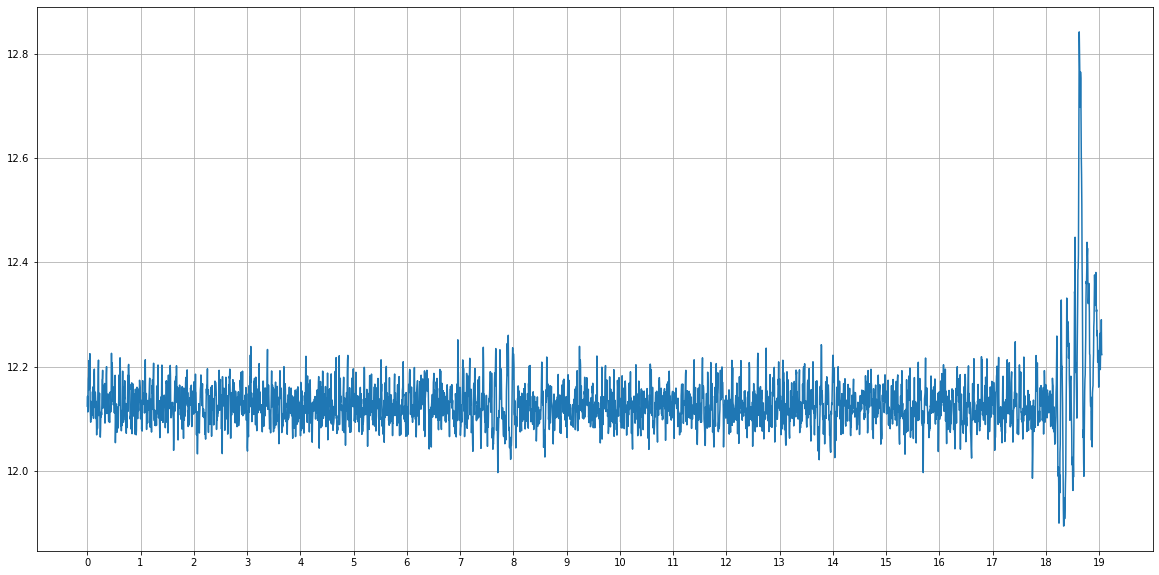

Enter the minimum time value to be consideredq
Enter the maximum time value to be considered1
interrupted by user :error with values q and 1 length of df 3903


In [21]:
time = float(input('How long is each data sample ? :'))
samplingRate = float(input('What is the sampling rate ? :'))

for person in people_list:
    
    print("Data Cleaning for : {} ".format(person))
    
    # path of the records
    person_PATH = PATH + '/' + person
    
    #list of speeds for each person
    person_instances = os.listdir(person_PATH)
    
    for instance in person_instances:
        
        print('Cleaning data for {} for the speed {} '.format(person, instance))
        
        # get path
        current_PATH = person_PATH + '/' + instance
        
        #prep the dataframe
        #Use clean_df2 for ',' 30CB and clean_df for '/t' seperated Bo55 . clean_df for plotting graphs for already cleaned data
        current_person_df = clean_df(current_PATH)
        remove_csv(person, instance)
        current_person_df = conversion_df(current_person_df)
        current_person_df = resultant_df(current_person_df)
        
        #plot graph
        #lt.plot(current_person_df[])
        #print(current_person_df.columns)
        plt.figure(figsize = (20,10))

        plt.plot(current_person_df['Timestamp_CAL'], current_person_df['Resultant_Accel'])
        plt.xticks(np.arange(current_person_df.Timestamp_CAL.iloc[0],current_person_df.Timestamp_CAL.iloc[-1], step=1))
        plt.grid()
        plt.show()
        
    
        
        adjust_df(current_person_df, person,instance, time, samplingRate)
        #save_csv(df,person, instance)
        
#         except:
#             print('this did not work out for {} at speed {}'.format(person, instance))
        clear_output(wait = True)

In [4]:
%ls data/p1

10.csv*  12.csv*  14.csv*  16.csv*  18.csv*  2.csv*  4.csv*  6.csv*  8.csv*
11.csv*  13.csv*  15.csv*  17.csv*  1.csv*   3.csv*  5.csv*  7.csv*  9.csv*


In [5]:
pd.read_csv("data_collection.csv")

Index                      Action
0       1                      Typing
1       2                    Standing
2       3                     Sitting
3       4     Touch all parts of face
4       5                Touch cheeks
5       6                 Touch mouth
6       7                  Touch nose
7       8             Touch right eye
8       9              touch left eye
9      10  Pick up an item from table
10     11            Eat with a spoon
11     12                     Walking
12     13               Walk upstairs
13     14             Walk downstairs
14     15                 Drink water
15     16                  Close door
16     17                   Open door
17     18       Place item on a shelf

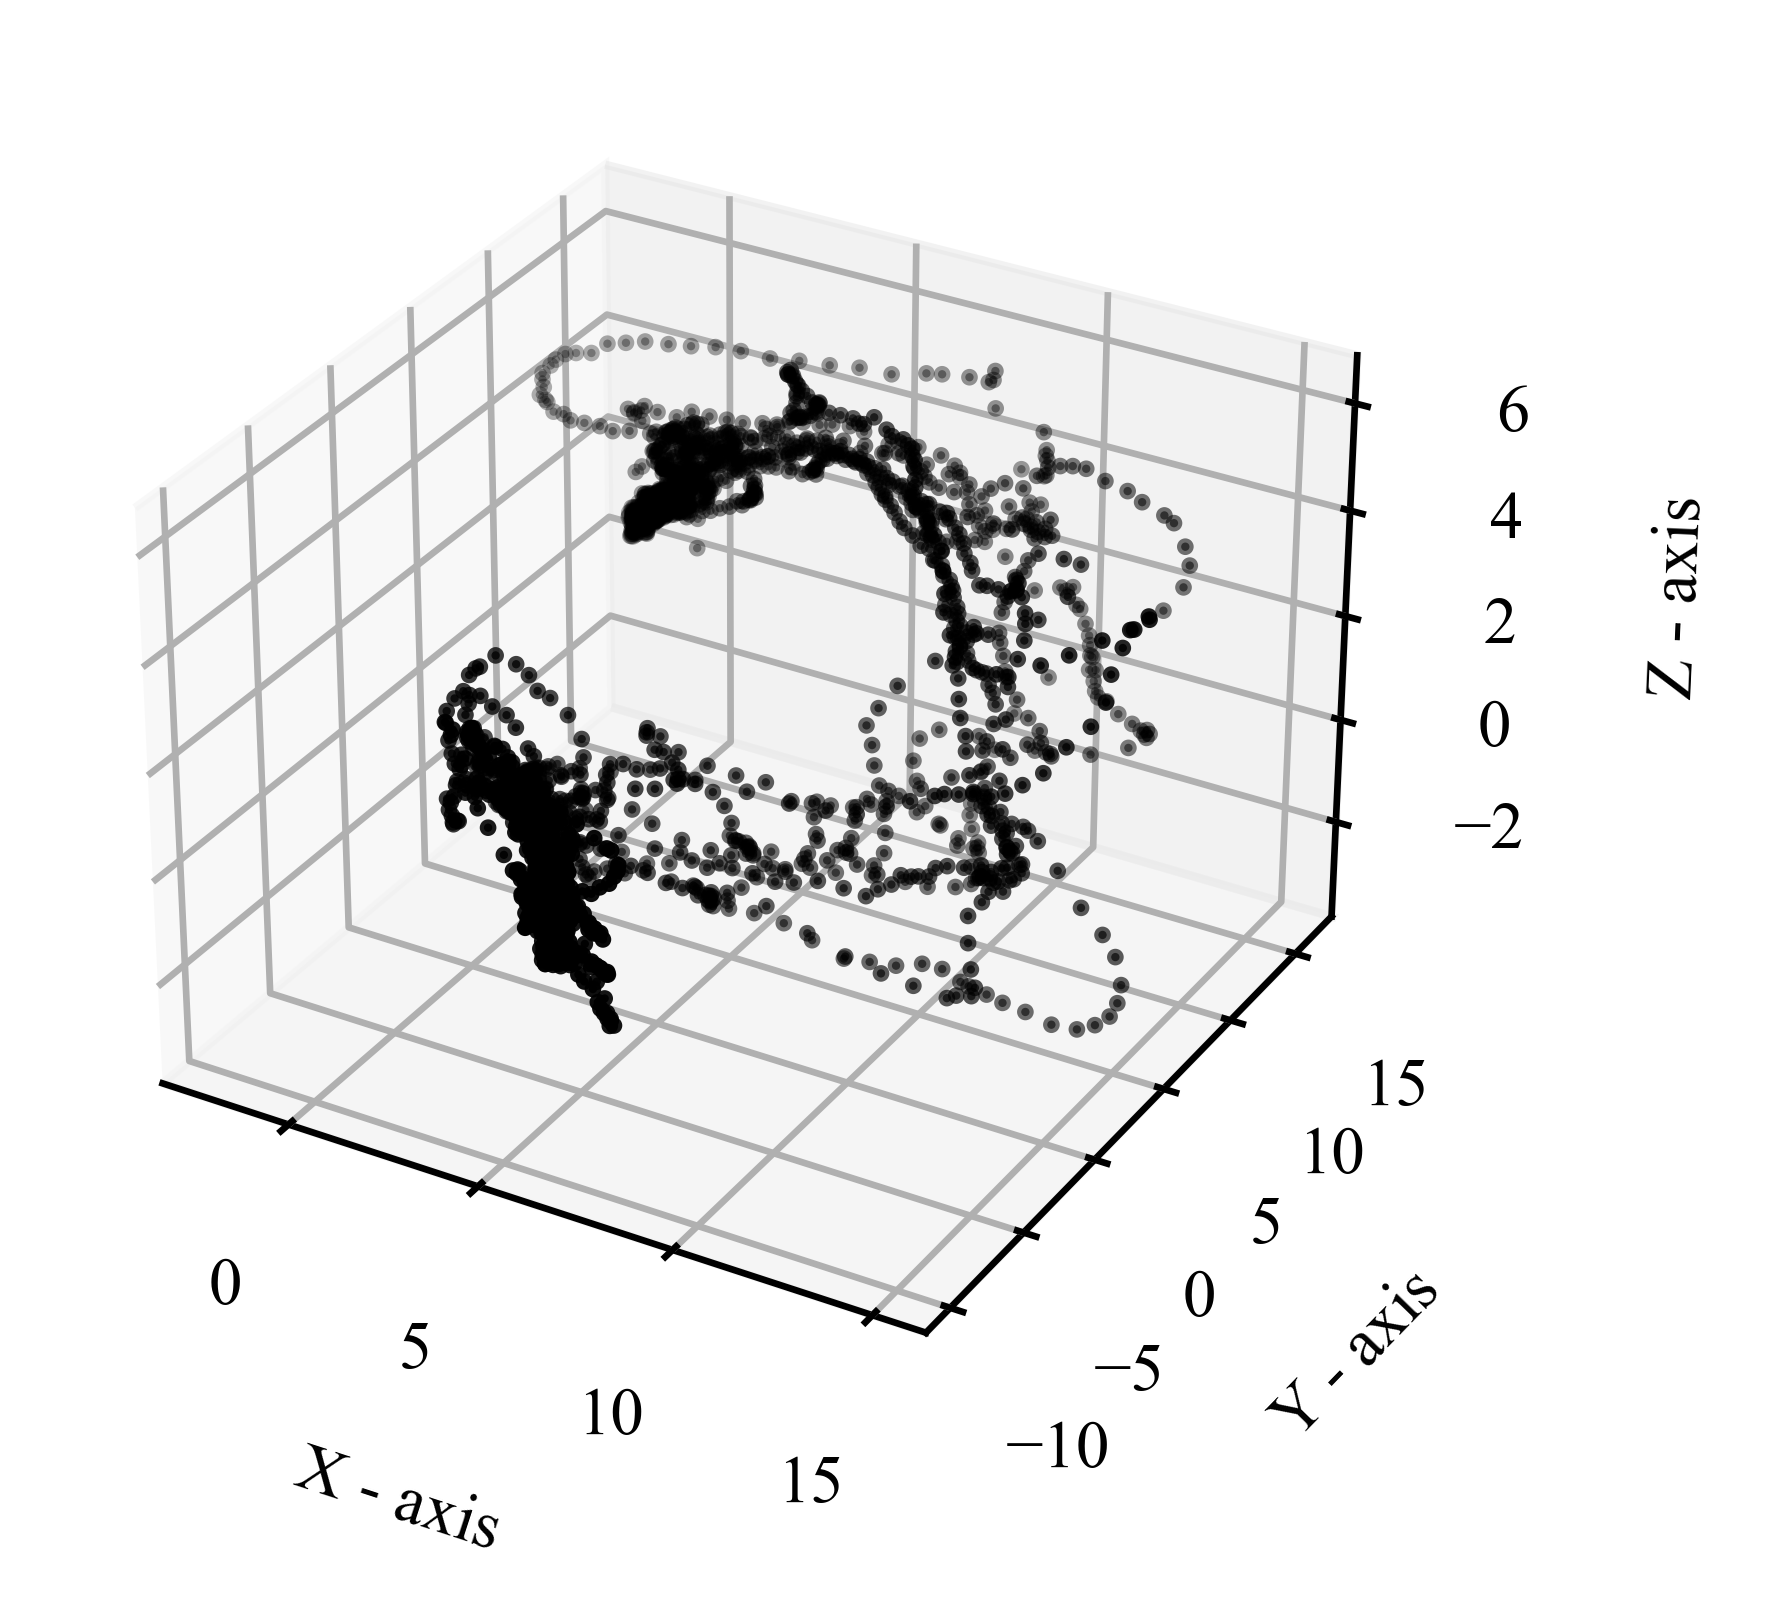

In [29]:
clean_PATH = 'data' 
instances = os.listdir(clean_PATH + '/' 'p1')
xmin = 0
xmax = 0
ymin = 0
ymax = 0
zmin = 0
zmax = 0

def mins(no, lis):
    if no < min(lis):
        return no
    else :
        return min(lis)
    
def maxs(no, lis):
    if no > max(lis):
        return no
    else :
        return max(lis)

#clean_PATH = 'home/'

plt.rcParams['font.size'] = 8
plt.rcParams['hatch.linewidth'] = 0.25
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 600
plt.rcParams["lines.linewidth"] = 0.01
plt.rcParams['hatch.linewidth'] = 0.15

sample_size = 4000
instances = ['7.csv']
for instance in instances:
    df = pd.read_csv(clean_PATH + '/' 'p1' + '/' + instance)    
    fig = plt.figure(figsize = (3,3))
    ax = plt.axes(projection='3d')

    xdata = df['Accel_WR_X_CAL'][:sample_size]
    ydata = df['Accel_WR_Y_CAL'][:sample_size]
    zdata = df['Accel_WR_Z_CAL'][:sample_size]
    tdata = df['Timestamp_CAL'][:sample_size]

    #ax.set_xlim(-9,18)
    #ax.set_ylim(-11,22)
    #ax.set_zlim(-6,12)

    ax.set_xlabel('X - axis')
    ax.set_ylabel('Y - axis ')
    ax.set_zlabel('Z - axis')
    
   # ax.set_yticks([0,5,10,15])
    #ax.set_title(" ".join(instance[:-4].split(sep ='_')).capitalize(), fontsize = 14)
    ax.scatter3D(xdata,ydata,zdata, c ='black', s=1);
    plt.savefig('plots/' + " ".join(instance[:-4].split(sep ='_')).capitalize() +'.png')

plt.show()
%matplotlib inline

In [11]:

instances

['12.csv',
 '5.csv',
 '2.csv',
 '9.csv',
 '11.csv',
 '14.csv',
 '15.csv',
 '8.csv',
 '18.csv',
 '7.csv',
 '1.csv',
 '6.csv',
 '17.csv',
 '4.csv',
 '10.csv',
 '3.csv',
 '13.csv',
 '16.csv']

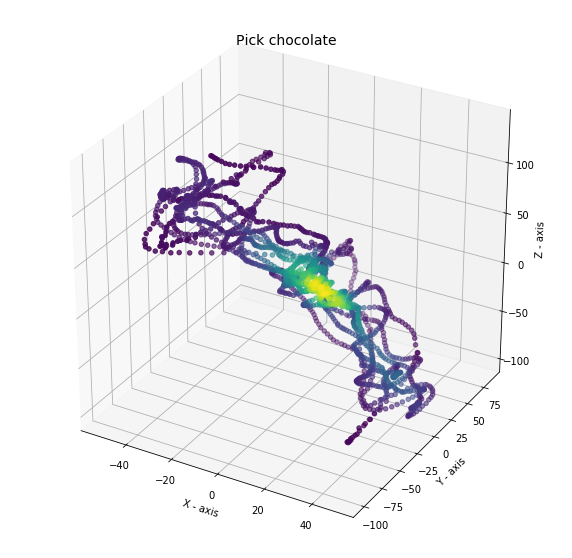

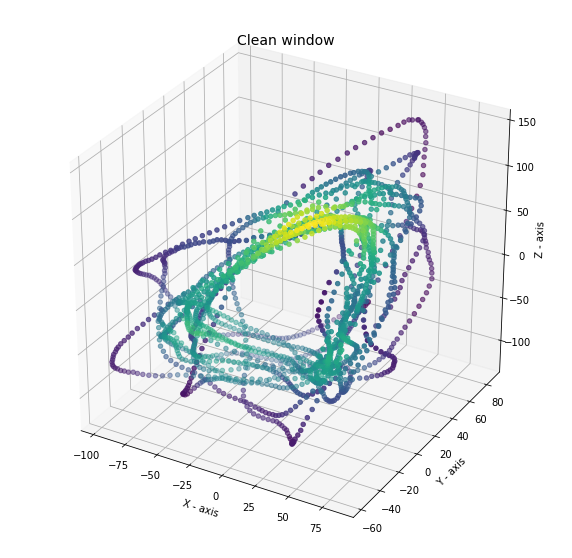

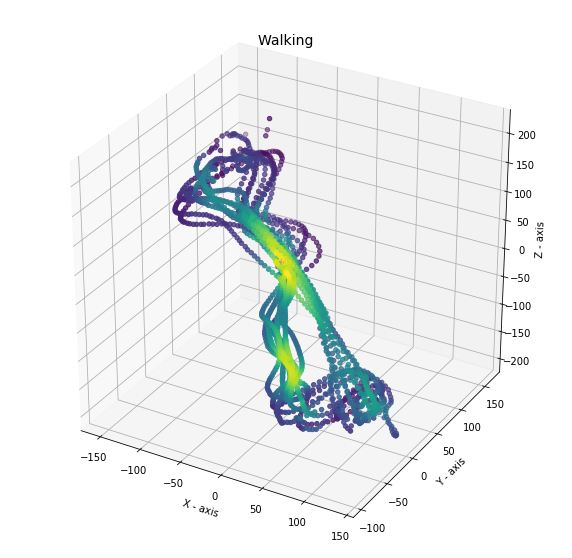

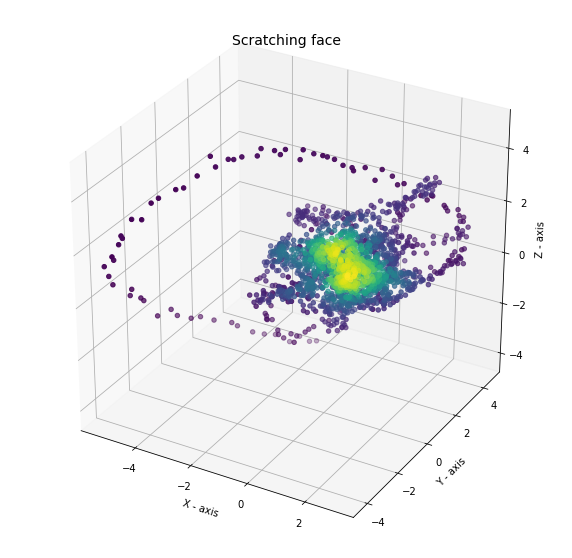

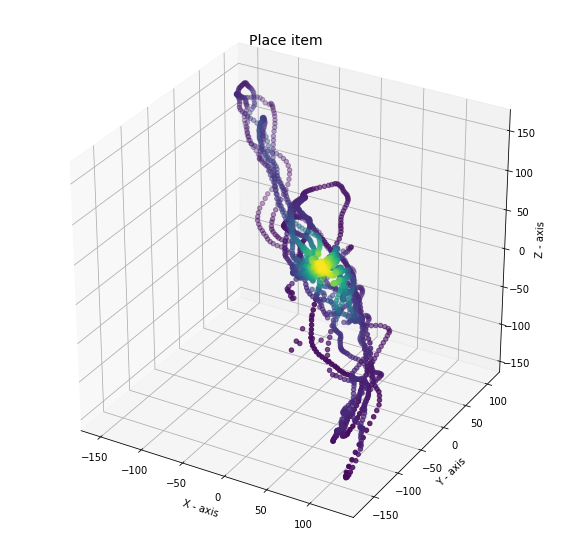

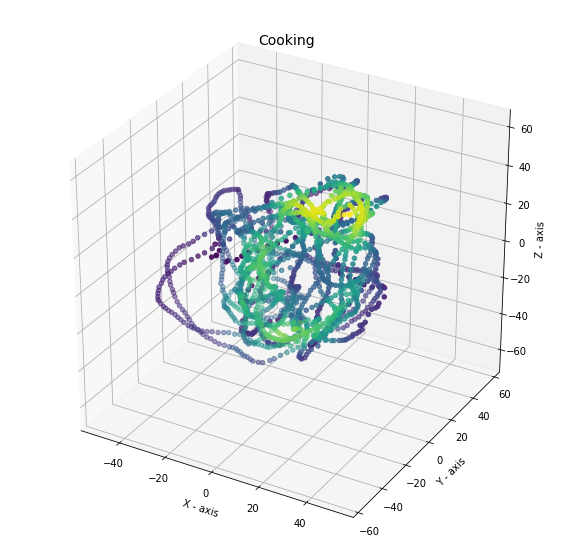

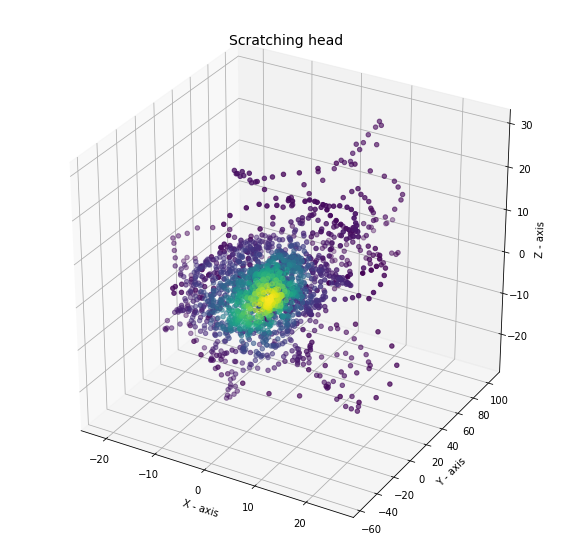

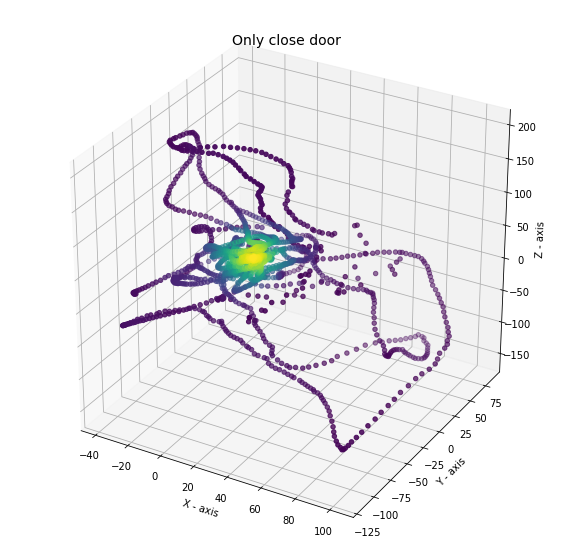

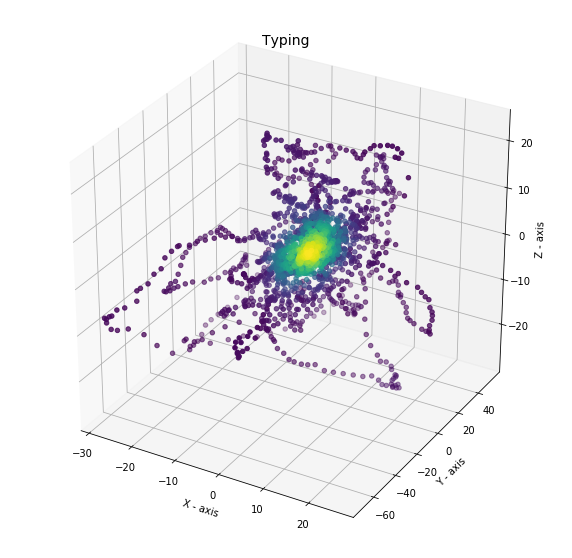

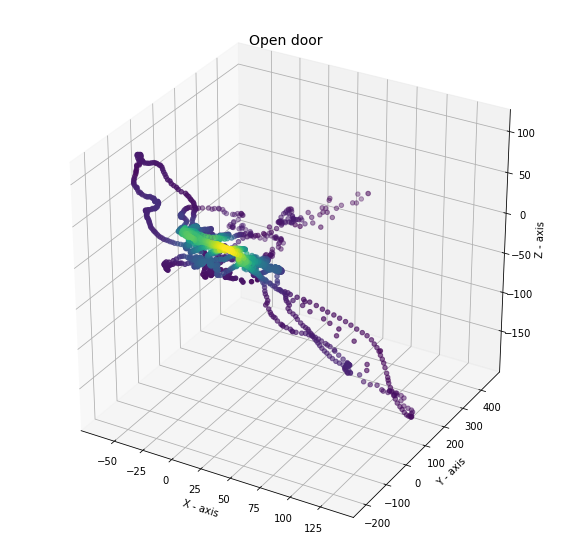

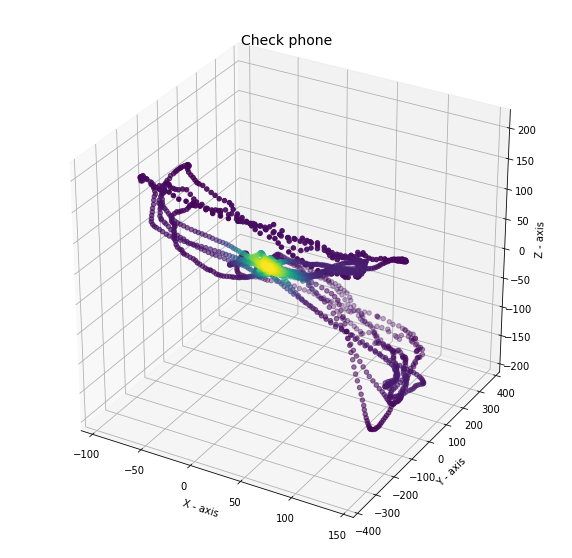

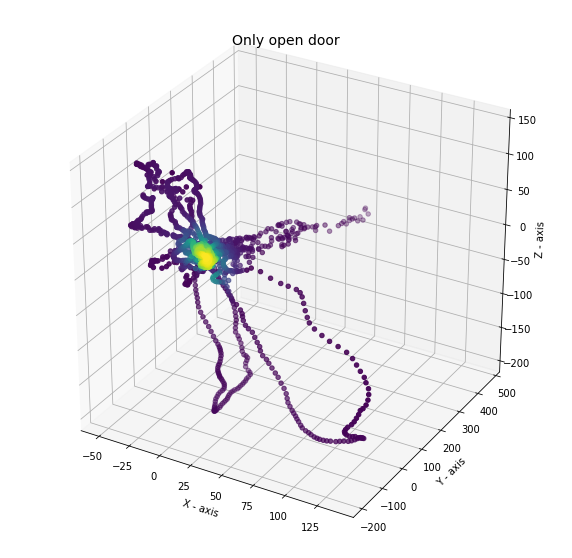

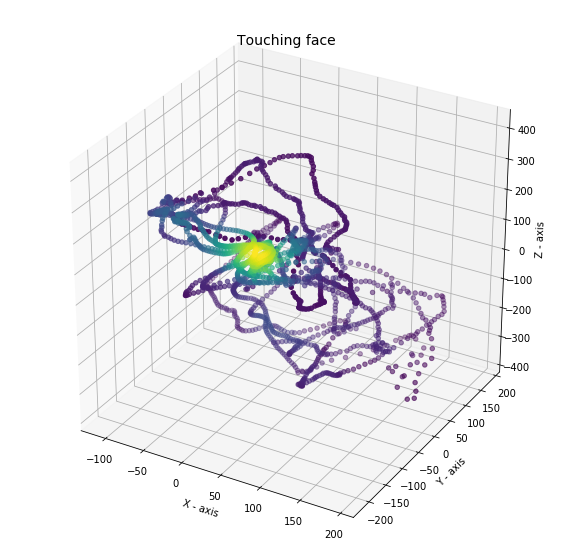

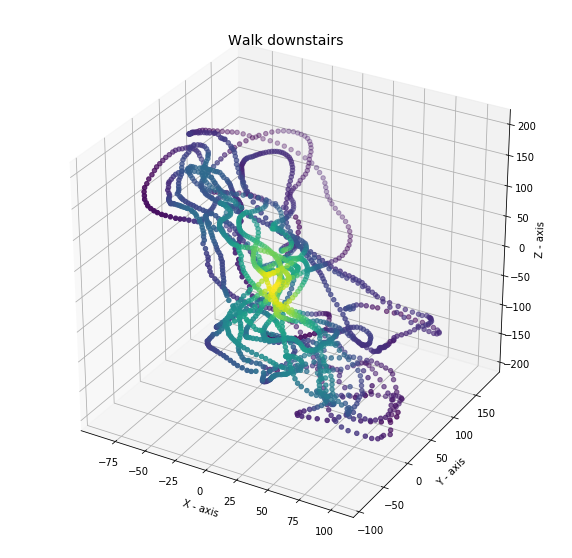

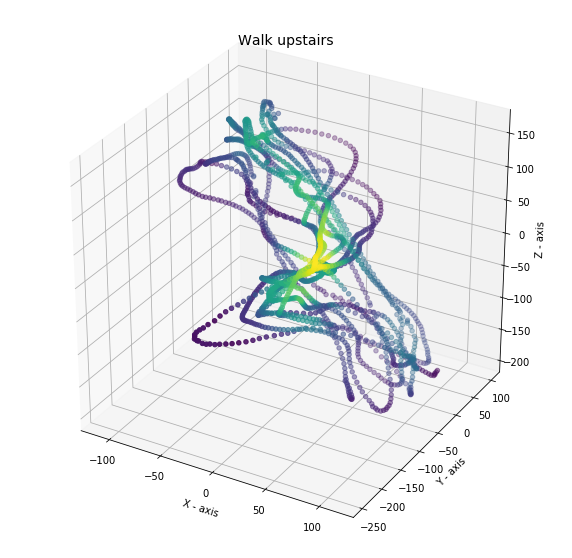

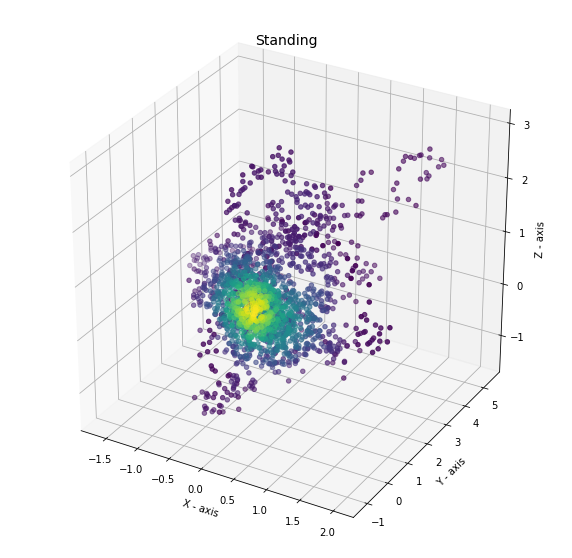

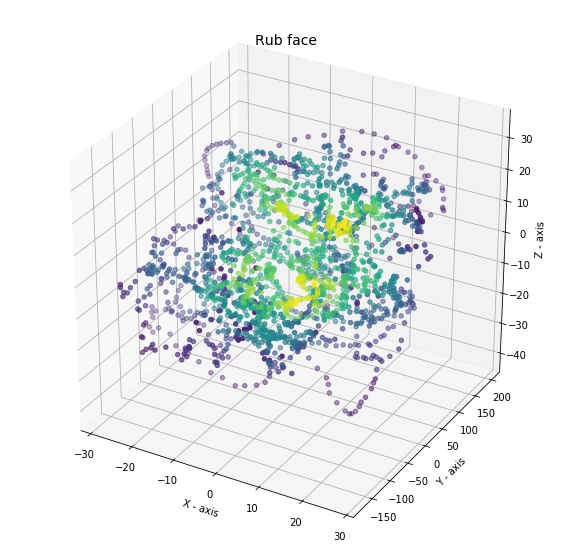

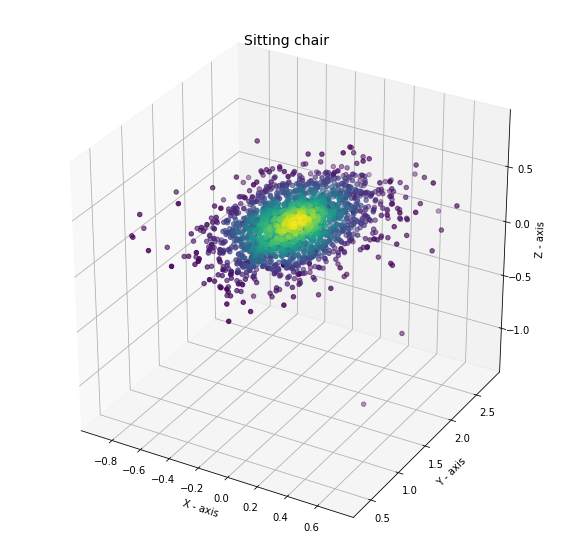

In [4]:
from scipy import stats

instances = os.listdir(clean_PATH + '/' 'Devesh')

    
sample_size = 2000
for instance in instances:
    df = pd.read_csv(clean_PATH + '/' 'Devesh' + '/' + instance)    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')

    xdata = df['Gyro_X_CAL'][:sample_size]
    ydata = df['Gyro_Y_CAL'][:sample_size]
    zdata = df['Gyro_Z_CAL'][:sample_size]
    tdata = df['Timestamp_CAL'][:sample_size]
    xyz = np.vstack([xdata,ydata,zdata])
    density = stats.gaussian_kde(xyz)(xyz)
    idx = density.argsort()
    x, y, z, density = xdata[idx], ydata[idx], zdata[idx], density[idx]
    
#     ax.set_xlim(-9,18)
#     ax.set_ylim(-11,22)
#     ax.set_zlim(-6,12)

    ax.set_xlabel('X - axis')
    ax.set_ylabel('Y - axis ')
    ax.set_zlabel('Z - axis')
    
    ax.set_title(" ".join(instance[:-4].split(sep ='_')).capitalize(), fontsize = 14)
    ax.scatter(x,y,z,c=density)
    #ax.scatter3D(xdata,ydata,zdata, c ='black');
    plt.savefig('/home/drdev/Documents/3d_plots/' + " ".join(instance[:-4].split(sep ='_')).capitalize() +'.jpg')


In [5]:
# Plotting multiple activities in one graph
colors = ['#36803a','#0ce8f0','#9d25b0','#f21000','black','orange','violet','pink','brown']
count = 0
data_prep =pd.DataFrame(columns = ['Accel_WR_X_CAL','Accel_WR_Y_CAL','Accel_WR_Z_CAL','Timestamp_CAL','activity', 'color'])
PATH = '/home/drdev/Documents/face_touch_limit/' +  'Devesh/'
instances = os.listdir(PATH)
for instance in instances:
    #read each file
    df = pd.read_csv( PATH + instance)#[:400]   
    # filter needed columns
    df = df[['Accel_WR_X_CAL','Accel_WR_Y_CAL','Accel_WR_Z_CAL','Timestamp_CAL']]#.sample(600)
    #add activity columnn
    df['activity'] = instance[:-4]
    df['color'] = colors[count]
    data_prep = data_prep.append(df)
    count = count+1

In [6]:
instances

['touching_face.csv', 'standing.csv']

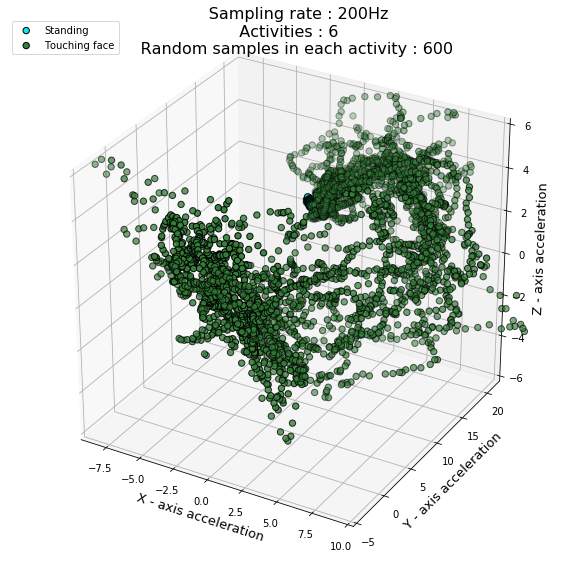

In [7]:
#group_df = data_prep.groupby(by ='activity')

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
group_df = data_prep.groupby(by='activity')
#plt.tight_layout()
for group in group_df.groups:
    data_prepg = group_df.get_group(group)
    xdata = data_prepg['Accel_WR_X_CAL']#[:sample_size]
    ydata = data_prepg['Accel_WR_Y_CAL']#[:sample_size]
    zdata = data_prepg['Accel_WR_Z_CAL']#[:sample_size]
    tdata = data_prepg['Timestamp_CAL']#[:sample_size]

    ax.set_xlim(-9,10)
    ax.set_ylim(-5,22)
    ax.set_zlim(-6,6)

    ax.set_xlabel('X - axis acceleration', fontsize = 13)
    ax.set_ylabel('Y - axis acceleration',fontsize = 13)
    ax.set_zlabel('Z - axis acceleration',fontsize = 13)

    #ax.set_title(" ".join(instance[:-4].split(sep ='_')).capitalize(), fontsize = 14)
    ax.scatter3D(xdata,ydata,zdata, c = list(data_prepg['color']),edgecolor='black',s=40, label=group.replace('_',' ').capitalize())
    #ax.legend()
    #plt.savefig('/home/drdev/Documents/3d_plots/' + " ".join(instance[:-4].split(sep ='_')).capitalize() +'.jpg')
plt.title('      Sampling rate : 200Hz \n  Activities : 6 \n    Random samples in each activity : 600', fontsize = 16)

plt.legend(loc='upper left')
#plt.show()
#%matplotlib inline
plt.savefig('/home/drdev/Documents/3d_plots/' + 'all_activities_600' +'.jpg')

In [8]:
data_prep['color']

0       #36803a
1       #36803a
2       #36803a
3       #36803a
4       #36803a
         ...   
4091    #0ce8f0
4092    #0ce8f0
4093    #0ce8f0
4094    #0ce8f0
4095    #0ce8f0
Name: color, Length: 8192, dtype: object

In [9]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))


instances = os.listdir(clean_PATH + '/' 'Devesh')

for instance in instances:
    df = pd.read_csv(clean_PATH + '/' 'Devesh' + '/' + instance)
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    
    x  = df['Accel_WR_X_CAL'][:1000]
    y = df['Accel_WR_Y_CAL'][:1000]
    X,Y = np.meshgrid(x, y)
    Z = f(X, Y)
    zdata = df['Accel_WR_Z_CAL'][:1000]
    ax.set_title(instance[:-4])
    ax.contour3D(X,Y,Z ,1000 cmap='binary');



SyntaxError: invalid syntax (<ipython-input-9-076699c72aab>, line 18)

In [10]:
np.arange(-20, 20, 5)

array([-20, -15, -10,  -5,   0,   5,  10,  15])

In [11]:
y[0:3],Y[0:3]

NameError: name 'Y' is not defined



# Check all the cleaned data

In [7]:
import time
import os
import pandas as pd
for profile in os.listdir('/home/drdev/Documents/face_touch_clean/'):
    profile_path  = '/home/drdev/Documents/face_touch_clean' + '/' + profile 
    for speed in os.listdir(profile_path):
        plot_path = profile_path + '/' + speed 
        plot_df = pd.read_csv(plot_path).resample(,)
        plt.plot( list(plot_df['Timestamp_CAL']),list(plot_df['Resultant_Accel']))
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.title('Plot for {} at speed {}'.format(profile, speed))
        plt.show()
        time.sleep(60*0.01)
        clear_output(wait=True)

TypeError: resample() missing 1 required positional argument: 'rule'

In [28]:
plt.plot(


                        np.fft.fftfreq(len(current_person_df['Resultant_Accel']), d = 1/51.1)[range(int(len(current_person_df['Resultant_Accel'])/12))]

                     ,


                        abs(   (np.fft.fft(current_person_df['Resultant_Accel'])/1535)[range(int(len(current_person_df['Resultant_Accel'])/12))]    )
                        , 
                    color='teal', 
                    label = 'H : ' )#+str(speed_list['Height'].iloc[count])+'cm')
        
# axs[j,i].legend()
# #axs[j,i].set_xticks(np.round(np.linspace(0,4,12),1))
# axs[j,i].set_xlabel('Frequency')
# axs[j,i].set_ylabel('Absolute Value')
# axs[j,i].set_xticks(np.round(np.linspace(0,4,12),1))
# axs[j,i].set_yticks(np.round(np.linspace(0,6,12),1))
# count = count+1


NameError: name 'current_person_df' is not defined

In [12]:
clean_PATH = '/home/drdev/Documents/face_touch_limit/Devesh/'

In [13]:
from sklearn.cluster import KMeans

In [36]:
#go through each file
#clean_PATH
import numpy as np

#resample the data to 50Hz @later
labels = list()
Features = list()

#data_prep = pd.DataFrame(columns = ['Accel_WR_X_CAL','Accel_WR_Y_CAL','Accel_WR_Z_CAL','Activity'])
# prepare dataset sliding windwos but no overlap

for instance in os.listdir(clean_PATH):
    
    instance_df = pd.read_csv(clean_PATH + '/' +instance)
    instance_df.reset_index(drop = True, inplace = True)
    for i in np.linspace(0,14.9,150):
        #print(i)
        inst_df = instance_df.loc[i*200:(i+0.1)*200]
        inst_df.reset_index(drop = True, inplace = True)
        inst_df = inst_df[0:20]
        #print(inst_df.shape)
        labels.append(instance[:-4])
        feat_x = inst_df['Accel_WR_X_CAL']
        feat_y = inst_df['Accel_WR_Y_CAL']
        feat_z = inst_df['Accel_WR_Z_CAL']
        feat_xyz = np.array([feat_x,feat_y,feat_z]).flatten()
        #print(feat_xyz.shape)
        Features.append(feat_xyz)

labels = np.array(labels)
Features = np.array(Features)

#train test split



In [37]:
Features.shape

(300, 60)

In [38]:
np.linspace(0,19.75,80)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75])

In [39]:
from sklearn.cluster import KMeans

In [40]:
clust = KMeans(n_clusters = 2).fit(Features)

(array([ 70.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 230.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

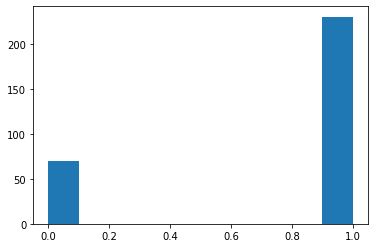

In [21]:
plt.hist(clust.labels_)

([0, 1], <a list of 2 Text xticklabel objects>)

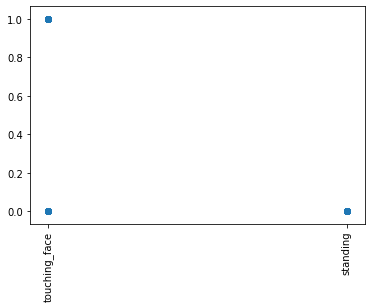

In [41]:
plt.scatter(labels,clust.labels_)
plt.xticks(rotation='vertical')

In [224]:
touch = group_df.get_group('walking_upstairs')
touch.reset_index(drop = True, inplace = True)


KeyError: 'walking'

In [46]:
Featurest = list()
count = 0

for instance in os.listdir(clean_PATH):
    instance_df = pd.read_csv(clean_PATH + '/' +instance)
    instance_df.reset_index(drop = True, inplace = True)
    for i in np.linspace(0,19.9,200):
        #print(i)
        inst_df = instance_df.loc[i*200:(i+0.1)*200]
        inst_df.reset_index(drop = True, inplace = True)
        inst_df = inst_df[0:20]

        #labels.append(instance[:-4])
        feat_x = inst_df['Accel_WR_X_CAL']
        feat_y = inst_df['Accel_WR_Y_CAL']
        feat_z = inst_df['Accel_WR_Z_CAL']
        feat_xyz = np.array([feat_x,feat_y,feat_z]).flatten()
        #print(feat_xyz)
        #Featurest = list(Featurest)
        Featurest.append(feat_xyz)
        #Featurest = np.array(Featurest)
        #print(clust.predict(Featurest[count].reshape(1,-1)))
        count = count+1
Featurest = np.array(Featurest)
print(clust.predict(Featurest))
print(len(labels))

[1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
300


In [44]:
Featurest.shape

(400, 60)

In [45]:
print(len(clust.predict(Featurest)))

400


In [42]:
instance_df

Unnamed: 0  Accel_LN_X_UNCAL  Accel_LN_X_CAL  Accel_LN_Y_CAL  \
0           2666            1296.0        2.945652       10.402174   
1           2667            1297.0        2.880435       10.391304   
2           2668            1298.0        2.902174       10.380435   
3           2669            1297.0        2.891304       10.391304   
4           2670            1296.0        2.847826       10.402174   
...          ...               ...             ...             ...   
4091        6757            1287.0        3.032609       10.500000   
4092        6758            1289.0        3.032609       10.478261   
4093        6759            1290.0        3.119565       10.467391   
4094        6760            1292.0        3.086957       10.445652   
4095        6761            1292.0        3.043478       10.445652   

      Accel_LN_Y_UNCAL  Accel_LN_Z_CAL  Accel_LN_Z_UNCAL  \
0               1982.0        5.402174            1756.0   
1               1988.0        5.391304            1757.0   
2               1986.0        5.380435            1758.0   
3               1987.0        5.456522            1751.0   
4               1991.0        5.391304            1757.0   
...                ...             ...               ...   
4091            1974.0        5.326087            1763.0   
4092            1974.0        5.304348            1765.0   
4093            1966.0        5.228261            1772.0   
4094            1969.0        5.282609            1767.0   
4095            1973.0        5.239130            1771.0   

      System_Timestamp_Plot_Zeroed_CAL  GSR_Skin_Resistance_CAL  \
0                         13007.812500            100100.000000   
1                         13012.695312            109865.853659   
2                         13017.578125            100100.000000   
3                         13022.460938             95840.425532   
4                         13027.343750            104755.813953   
...                                ...                      ...   
4091                      32988.281250            104755.813953   
4092                      32993.164062            100100.000000   
4093                      32998.046875            115500.000000   
4094                      33002.929688             95840.425532   
4095                      33007.812500            104755.813953   

      GSR_Skin_Resistance_UNCAL  ...  GSR_Skin_Conductance_CAL  \
0                         705.0  ...                  0.009990   
1                         703.0  ...                  0.009102   
2                         705.0  ...                  0.009990   
3                         706.0  ...                  0.010434   
4                         704.0  ...                  0.009546   
...                         ...  ...                       ...   
4091                      704.0  ...                  0.009546   
4092                      705.0  ...                  0.009990   
4093                      702.0  ...                  0.008658   
4094                      706.0  ...                  0.010434   
4095                      704.0  ...                  0.009546   

      GSR_Skin_Conductance_UNCAL  GSR_Skin_Conductance_CAL.1  \
0                          705.0                    0.009990   
1                          703.0                    0.009102   
2                          705.0                    0.009990   
3                          706.0                    0.010434   
4                          704.0                    0.009546   
...                          ...                         ...   
4091                       704.0                    0.009546   
4092                       705.0                    0.009990   
4093                       702.0                    0.008658   
4094                       706.0                    0.010434   
4095                       704.0                    0.009546   

      Accel_WR_Z_UNCAL  Accel_WR_Z_CAL  Accel_WR_Y_UNCAL  Accel_WR_Y_CAL  \
0

In [208]:
np.linspace(0,9.9,100)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])